In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style('darkgrid')


In [34]:
data=pd.read_csv('dataset_Facebook.csv')
nuevo=data[['Total Interactions','Post Weekday','like','Post Hour']]


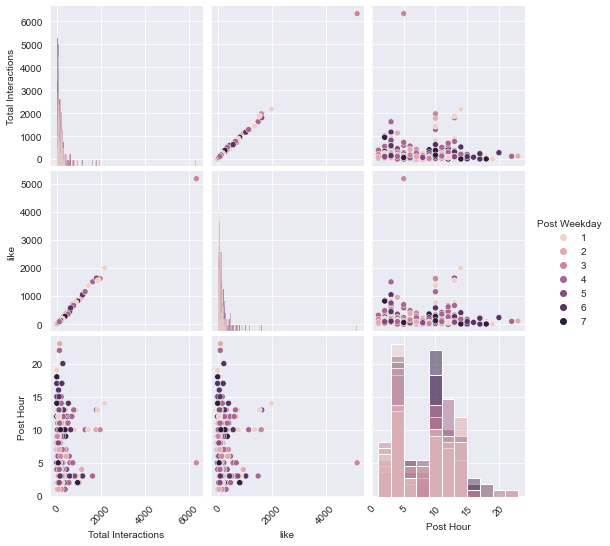

In [35]:
g=sns.pairplot(nuevo,hue='Post Weekday',diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)

In [36]:
data=data.replace(np.nan,'0')
share=data['share'].values
hour=data['Post Hour'].values
days=data['Post Weekday'].values
likes=data['like'].values
interaction=data['Total Interactions'].values

In [37]:
X=np.array([hour,days,interaction]).T
Y=np.array(likes)
print('X ',X.shape)
print('Y ',Y.shape)

X  (500, 3)
Y  (500,)


In [38]:
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
error=np.sqrt(mean_squared_error(Y,Y_pred))
r2=reg.score(X,Y)
print('El error es : ' ,error)
print('El valor de r2 es : ' ,r2)
print("Los coeficientes son : \n" ,reg.coef_)

El error es :  21.81953867915251
El valor de r2 es :  0.9954323615919498
Los coeficientes son : 
 [ 0.21551007 -0.40017767  0.84787796]


In [39]:
hour=17
days=1
interaction=150
print(' likes de la predicción \n ', reg.predict([[hour,days,interaction]]))

 likes de la predicción 
  [128.15445304]


## segunda dataset

In [40]:
from sklearn import datasets, linear_model


In [41]:
boston= datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


c:\Users\claud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
boston.data.shape[0]

506

In [44]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
X_mutiple= boston.data[:,5:8]
print(X_mutiple)

y_multiple= boston.target

[[ 6.575  65.2     4.09  ]
 [ 6.421  78.9     4.9671]
 [ 7.185  61.1     4.9671]
 ...
 [ 6.976  91.      2.1675]
 [ 6.794  89.3     2.3889]
 [ 6.03   80.8     2.505 ]]


In [46]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_mutiple,y_multiple,test_size=0.2)
lr_multiple=linear_model.LinearRegression()
lr_multiple.fit(X_train,y_train)
y_pred_multiple=lr_multiple.predict(X_test)

In [64]:
print( 'datos del modelo regresión lineal multiple')
print(' valor de las pendientes o coeficientes a: ')
print( lr_multiple.coef_)
print('valor de la intersección o coefficiente b: ')
print( lr_multiple.intercept_)
print('precisión del modelo: ')
print( lr_multiple.score(X_train,y_train))

datos del modelo regresión lineal multiple
 valor de las pendientes o coeficientes a: 
[ 8.51217429 -0.09511395 -0.56388542]
valor de la intersección o coefficiente b: 
-22.055374647704063
precisión del modelo: 
0.5327740351184391
